# Analyse prédictive des cours des actions FAANG

Réalisé par :
* ESSOH Lasme Ephrem Dominique
* ELAOUNI Fouzia

# Introduction

Dans ce travail, nous examinerons les données du marché boursier, en particulier celles des firmes technologique. Plus précisement, nous ménons une analyse prédictive des cours des actions FAANG.  

FAANG fait référence aux actions de cinq sociétés technologiques américaines de premier plan : Facebook (FB), Amazon (AMZN), Apple (AAPL), Netflix (NFLX) ; et Alphabet ou Google (GOOG). Le terme a été inventé par Jim Cramer, l'animateur de télévision de Mad Money de CNBC, en 2013, qui a félicité ces entreprises pour être totalement dominantes sur leurs marchés.

# 1 Chargement du jeu de données et traitement des données

## Installation du module pandas_datareader

Nous utilisons le module <b>pandas_datareader</b> afin de récuperer les données, par scrapping, du cours des actions du stock market FAANG. La source de données utilisée est <a href = "https://finance.yahoo.com/"> Yahoo! La finance </a>.

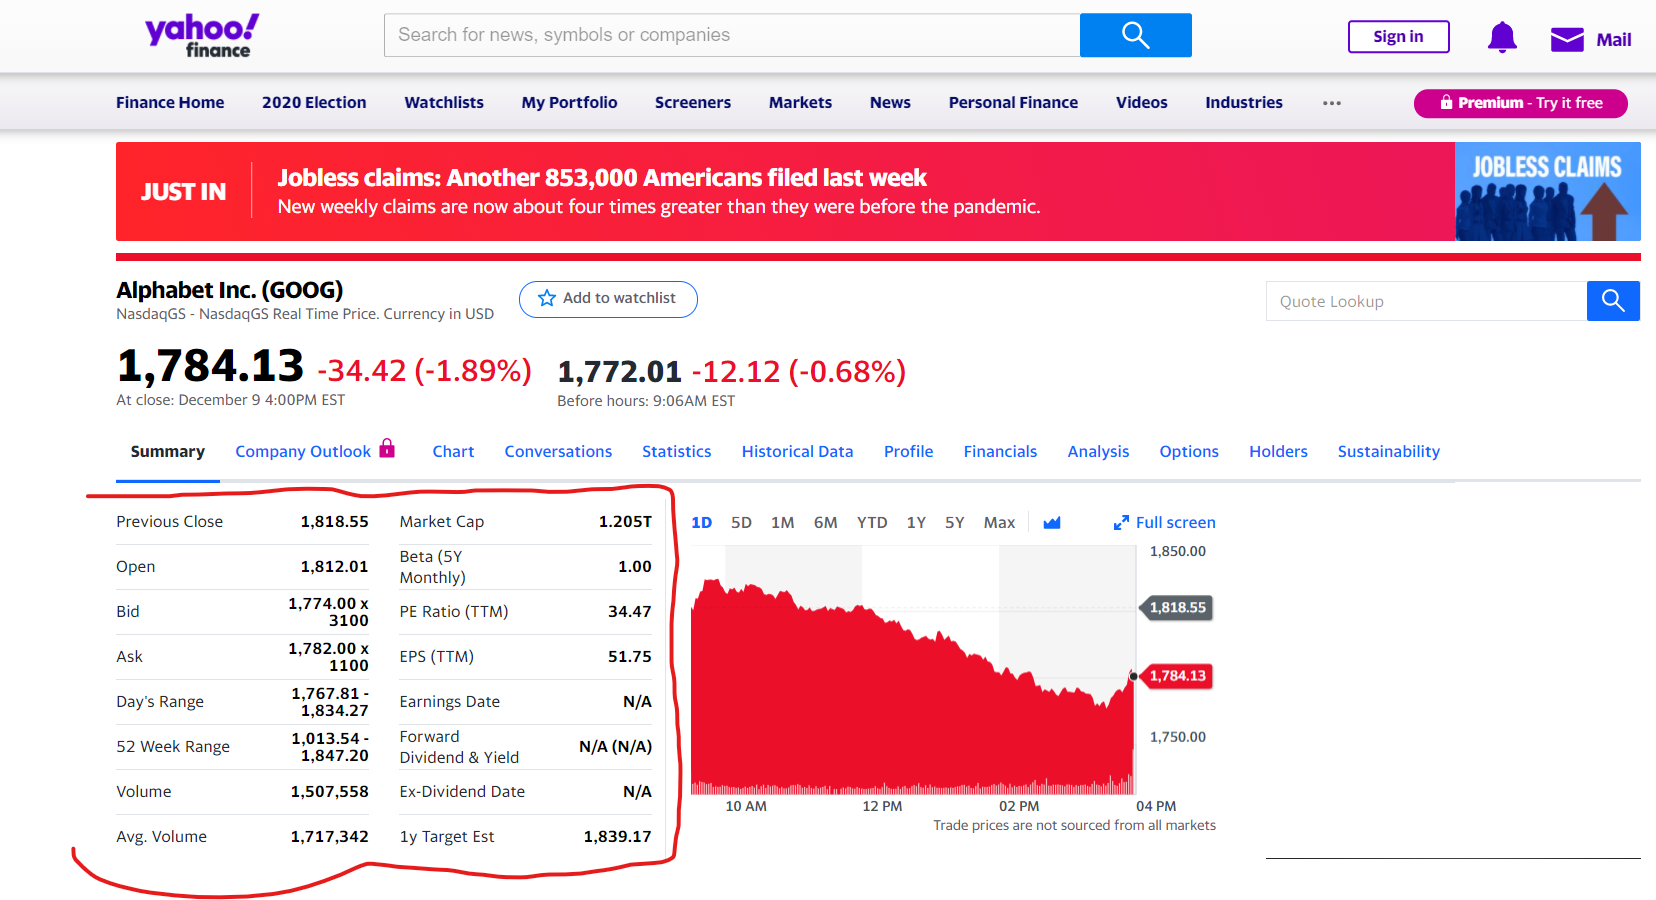

In [1]:
from IPython.display import Image
Image("img_yahoo_finance.png")

In [12]:
import sys
!{sys.executable} -m pip install pandas_datareader

## Récupération des données

In [4]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader #pour récup. les datas sur yahoo finance !
from datetime import datetime #gestion de dates

### récupération des séries temporelles des cours des actions pour chacune des 5 firmes étudiées

In [7]:
# liste des firmes de la tech
FAANG = ['FB','AAPL','AMZN', 'NFLX','GOOG']

# date de début et date de fin d'extraction des données : extraction de 1 année complète + 1 année retrospective de cours
fin = datetime.now()
debut = datetime(fin.year - 1, fin.month, fin.day)

# récupération des séries temporelles FB, AAPL, AMZN, NFLX et GOOG
for stock in FAANG :   
    globals()[stock] = DataReader(stock, 'yahoo', debut, fin)

### 2 exemples du format des données

Nous avons récupéré au total 5 séries temporelles : celles de FB, AAPL, AMZN, NFLX et GOOG. Chaque séries temporelles contient 5 variables :

* High = la valeur maximale du cours de l'action au jour aaaa-mm-jj (en USD)
* Low = la valeur minimale du cours de l'action au jour aaaa-mm-jj (en USD)
* Open = la valeur du cours de l'action à l'overture du marché au jour aaaa-mm-jj (en USD)
* Close = la valeur du cours de l'action à la fermeture du marché au jour aaaa-mm-jj (en USD)
* Volume = le volume total d'action négociés au jour aaaa-mm-jj (en nombre absolu)
* Adj Close = la valeur ajustée (par rapport au dividendes) du cours de l'action à la fermeture du marché au jour aaaa-mm-jj (en USD)

Par exemple, affichons 5 observations au harsard des données de FACEBOOK et APPLE :

In [8]:
FB.sample(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-04,191.830002,186.389999,189.169998,191.759995,23062500,191.759995
2020-04-27,193.750000,187.410004,192.660004,187.500000,29197800,187.500000
2020-07-13,250.149994,238.419998,247.009995,239.000000,24674900,239.000000
2020-06-17,237.589996,231.729996,235.000000,235.529999,19552800,235.529999
2020-02-07,212.820007,209.929993,210.300003,212.330002,12242500,212.330002


In [9]:
AAPL.sample(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-09,117.000000,114.919998,115.279999,116.970001,100506900.0,116.768547
2020-07-10,95.980003,94.705002,95.334999,95.919998,90257200.0,95.582466
2020-11-16,120.989998,118.150002,118.919998,120.300003,91183000.0,120.300003
2020-06-22,89.864998,87.787498,87.834999,89.717499,135445200.0,89.401787
2020-08-25,125.180000,123.052498,124.697502,124.824997,211495600.0,124.610016


### constitution de données de panel

A partir des 5 séries temporelles récupérées, nous constituons des données de panel en concatenant ces séries.

In [10]:
liste_firme = [FB, AAPL, AMZN, NFLX, GOOG]
nom_firme = ["FACEBOOK", "APPLE", "AMAZON", "NETFLIX", "GOOGLE"]

for firme, nom in zip(liste_firme, nom_firme):
    firme["Nom firme"] = nom
    
data = pd.concat(liste_firme, axis = 0)

Données finales : 
* Structure de données de panel $X_{it}$, $X_{it}$ désignant un vecteur ligne du tableau
* Contenant 5 individus statistiques (les firmes) : $i \in {1 \ldots 5}$
* Observés à une jour $t$ entre le jour d'aujourd'hui et le jour d'aujourd'hui diminué d'une année. Par exemple, au jour du 10/12/2020 d'utilisation de ce notebook, les données couvrent la période allant du 10/12/2019 au 10/12/2020.

In [11]:
data

,High,Low,Open,Close,Volume,Adj Close,Nom firme
Date,,,,,,,
2019-12-12,203.660004,194.100006,202.350006,196.750000,23734800.0,196.750000,FACEBOOK
2019-12-13,196.800003,193.169998,196.399994,194.110001,18798000.0,194.110001,FACEBOOK
2019-12-16,199.119995,194.809998,195.270004,197.919998,14911500.0,197.919998,FACEBOOK
2019-12-17,199.000000,196.130005,198.839996,198.389999,10175700.0,198.389999,FACEBOOK
2019-12-18,204.300003,200.089996,200.089996,202.500000,23274400.0,202.500000,FACEBOOK
...,...,...,...,...,...,...,...
2020-12-07,1832.369995,1805.780029,1819.000000,1819.479980,1320900.0,1819.479980,GOOGLE
2020-12-08,1821.900024,1796.204956,1810.099976,1818.550049,1096300.0,1818.550049,GOOGLE
2020-12-09,1834.270020,1767.810059,1812.010010,1784.130005,1507600.0,1784.130005,GOOGLE


# 2. Statistique descriptive et visualisation

### Niveau moyen des cours et du volume des actions négociés

In [12]:
vm_stock_2020 = round(data.groupby([(data.index.year), (data["Nom firme"])]).mean().loc[2020,:],2)

In [13]:
vm_stock_2020

,High,Low,Open,Close,Volume,Adj Close
Nom firme,,,,,,
AMAZON,2687.94,2612.51,2651.58,2651.40,4.999288e+06,2651.40
APPLE,94.76,92.02,93.37,93.45,1.470190e+08,92.92
FACEBOOK,235.86,228.69,232.24,232.46,2.275318e+07,232.46
GOOGLE,1484.77,1447.30,1464.78,1466.94,1.913517e+06,1466.94
NETFLIX,450.20,434.10,441.99,442.55,7.126442e+06,442.55


### Evolution du cours des actions journalières

Cette évolution sera appréciée à l'aide du profil temporel de la valeur ajustée du cours de l'action, ajustée à la fermeture du marché.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
def profil_temporel(var, dim_fig1, dim_fig2, subplot1, subplot2):
    plt.figure(figsize=(dim_fig1, dim_fig2))
    plt.subplots_adjust(top=1.25, bottom=1.2)
    for i, firme in enumerate(liste_firme, 1):
        plt.subplot(subplot1, subplot2, i)
        firme[var].plot()
        plt.ylabel(var)
        plt.xlabel(None)
        plt.title(f"{FAANG[i - 1]}")

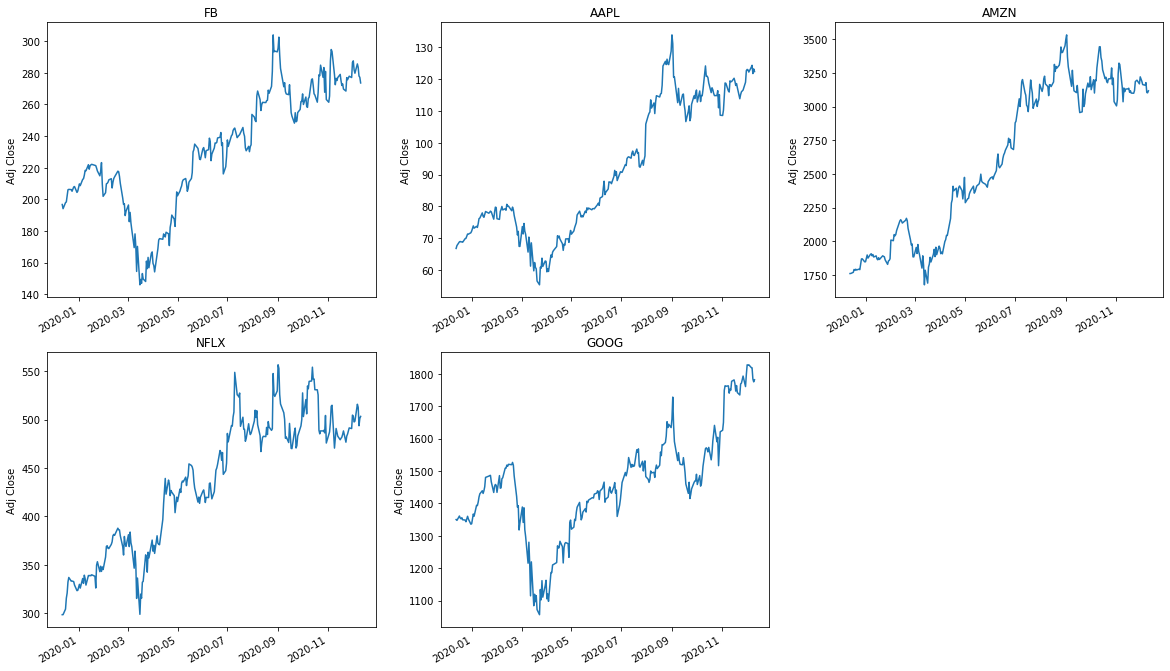

In [43]:
profil_temporel("Adj Close", 20, 8, 2, 3)

### Evolution du volume total des actions négociés

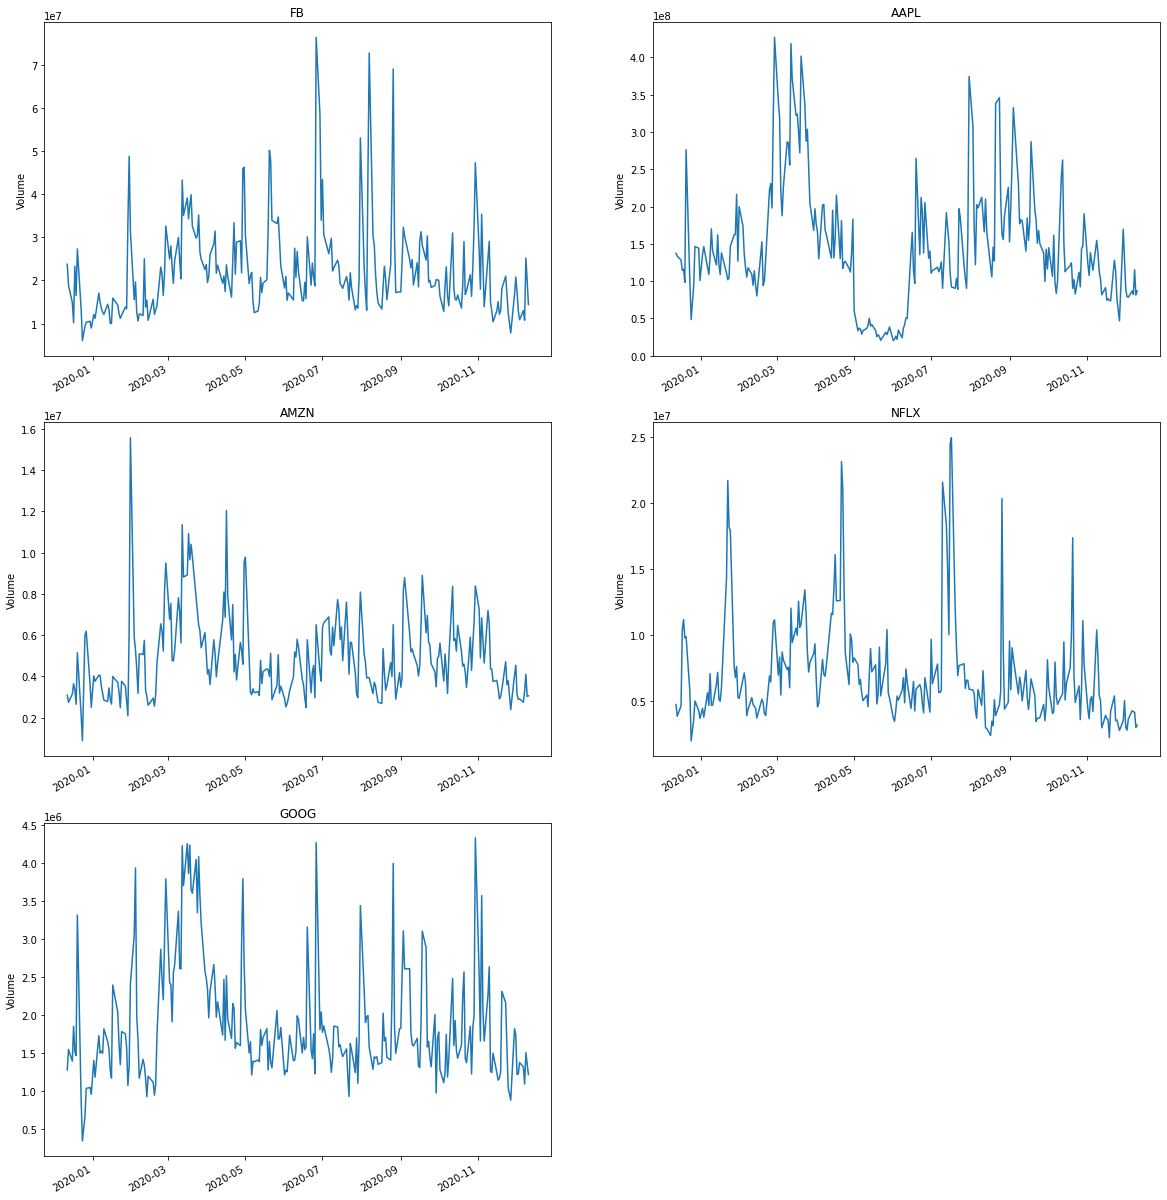

In [44]:
profil_temporel("Volume", 20, 15, 3, 2)

### Etude de la rentabilité des actifs

### Etude de la diversification des actifs

# 5. Modélisation

In [50]:
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.566676
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.634213
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.774481
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.908023
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.887549
...,...,...,...,...,...,...
2020-12-07,124.570000,122.250000,122.309998,123.750000,86712000.0,123.750000
2020-12-08,124.980003,123.089996,124.370003,124.379997,82225500.0,124.379997
2020-12-09,125.949997,121.000000,124.529999,121.779999,115089200.0,121.779999


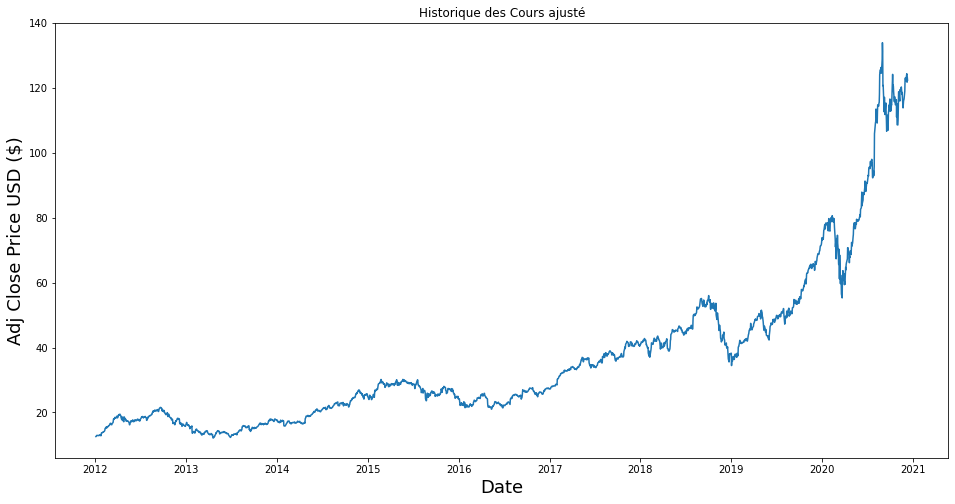

In [51]:
plt.figure(figsize=(16,8))
plt.title('Historique des Cours ajusté')
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.show()

In [56]:
#extraction du target
data = df.filter(['Adj Close'])
#conversion en matrice de valeurs numpy
dataset = data.values

In [59]:
#normalisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-0.98748692],
       [-0.98468296],
       [-0.97885945],
       ...,
       [ 3.54674414],
       [ 3.60735921],
       [ 3.57290018]])

In [116]:
#création jeu d'entrainement

#obtention du nombre de ligne du jeu d'entrainement
training_data_len = int(np.ceil( len(dataset) * .8 ))
training_data_len

#création du jeu d'entrainement à partir des données normalisées
train_data = scaled_data[0:int(training_data_len), :]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([-0.98748692, -0.98468296, -0.97885945, -0.97331516, -0.97416516,
       -0.97224949, -0.97312499, -0.97459662, -0.97660122, -0.97039713,
       -0.96480216, -0.96652758, -0.97597959, -0.96695904, -0.97583995,
       -0.94253622, -0.94511161, -0.94174961, -0.93447982, -0.93007745,
       -0.93044544, -0.93180283, -0.92601757, -0.9205748 , -0.91440877,
       -0.90444944, -0.88352839, -0.88321108, -0.8715643 , -0.86286097,
       -0.87781915, -0.87205907, -0.87217341, -0.85602259, -0.85831912,
       -0.85406879, -0.84643121, -0.84218081, -0.82993783, -0.82101891,
       -0.8184434 , -0.81754241, -0.83279239, -0.83647177, -0.83592624,
       -0.82158969, -0.81755531, -0.80888964, -0.78846355, -0.76121147,
       -0.76631172, -0.76629913, -0.74659587, -0.74043015, -0.74481976,
       -0.74882888, -0.75300303, -0.73913606, -0.72962054, -0.72563692])]
[-0.7354818628077764]

[array([-0.98748692, -0.98468296, -0.97885945, -0.97331516, -0.97416516,
       -0.97224949, -0.97312499, -0.9

In [118]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences= False))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(1))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 60, 100)           40800     
_________________________________________________________________
lstm_17 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_21 (Dense)             (None, 25)                2525      
_________________________________________________________________
dense_22 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 26        
Total params: 124,401
Trainable params: 124,401
Non-trainable params: 0
_________________________________________________________________


In [122]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
1742/1742 [==============================] - 23s 13ms/step - loss: 0.0028
Epoch 2/2
1742/1742 [==============================] - 23s 13ms/step - loss: 0.0015


In [123]:
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.7120893922219014

<ipython-input-124-423189b38217>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


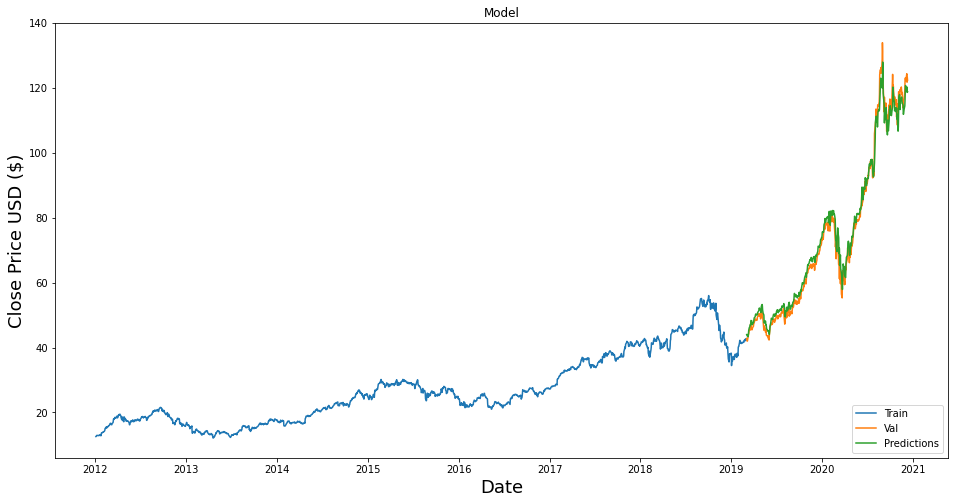

In [124]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [125]:
valid

,Adj Close,Predictions
Date,,
2019-03-05,42.697010,43.998802
2019-03-06,42.451332,44.060936
2019-03-07,41.959972,43.890331
2019-03-08,42.059708,43.463619
2019-03-11,43.516747,43.347546
...,...,...
2020-12-07,123.750000,118.890549
2020-12-08,124.379997,119.403038
2020-12-09,121.779999,120.263435


# Conclusion